## Introduction to Scikit-learn

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/Chapter_1_cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate_school,high_school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
my_lr = LogisticRegression() # as a best practice: explicitly provide every keyword parameter to the model when you create the object
my_lr

LogisticRegression()

In [5]:
my_lr.C = 0.1
my_lr.solver = 'liblinear'
my_lr

LogisticRegression(C=0.1, solver='liblinear')

In [6]:
X = df.EDUCATION[0:10].values.reshape(-1,1)
X.shape

(10, 1)

In [7]:
y = df['default payment next month'][0:10].values
y.shape

(10,)

In [8]:
my_lr.fit(X,y) # after this command the 'my_lr' object is a trained model!

LogisticRegression(C=0.1, solver='liblinear')

In [9]:
new_X = df.EDUCATION[10:20].values.reshape(-1,1)
my_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

### Generating synthetic data

In [11]:
from numpy.random import default_rng

rg = default_rng(12345)
X = rg.uniform(low=0, high=10, size=(1000,)) # one-dimensional vector 1000x1

In [12]:
slope = 0.25
intercept = -1.25

y = slope * X + intercept + rg.normal(loc=0.0, scale=1.0, size=(1000, ))

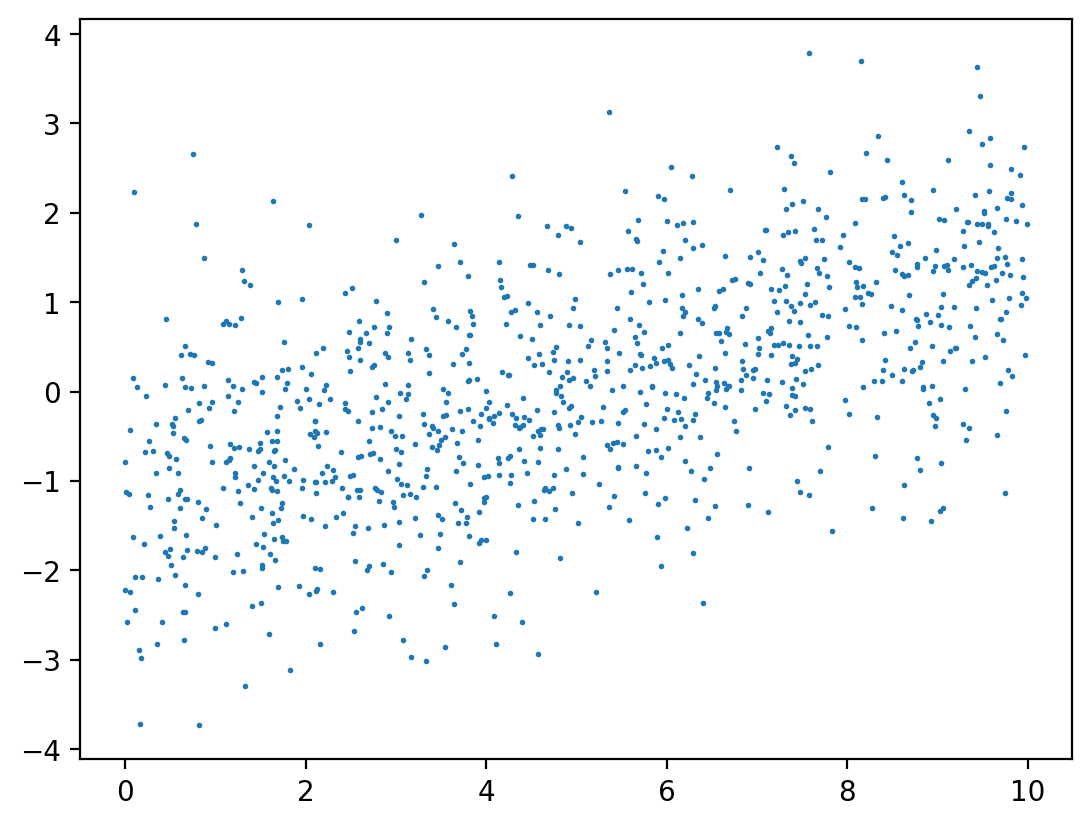

In [13]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.dpi'] = 200 # 'dots per inch' selection

plt.scatter(X,y,s=1)
plt.show()

### Linear regression in Scikit-learn

In [14]:
from sklearn.linear_model import LinearRegression

my_linearR = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)
my_linearR

LinearRegression()

In [15]:
y.shape

(1000,)

In [16]:
my_linearR.fit(X.reshape(-1,1), y)

LinearRegression()

In [17]:
my_linearR.coef_

array([0.25711689])

In [18]:
my_linearR.intercept_

-1.2522197212675905

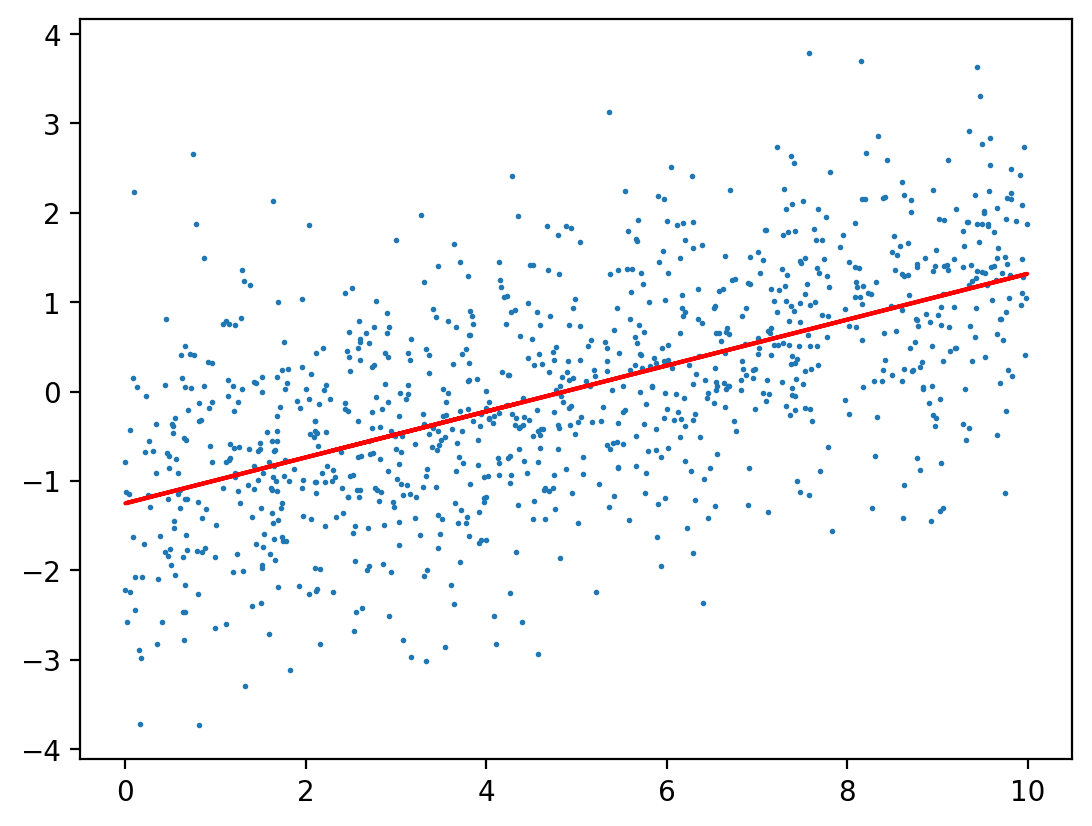

In [19]:
x_ = np.linspace(0, 10, 1000)
# l = X*my_linearR.coef_ + my_linearR.intercept_
y_pred = my_linearR.predict(X.reshape(-1,1))

# plt.plot(X, l, color='purple')
plt.plot(X, y_pred, color='red')
plt.scatter(X,y,s=1)

plt.show()

### Split the train and test data

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.EDUCATION.values.reshape(-1,1), df['default payment next month'].values, test_size=0.2, random_state=24)


In [21]:
n_rows_X_train = X_train.shape[0]
n_rows_X_test = X_test.shape[0]
n_rows_X_train/(n_rows_X_train + n_rows_X_test) # CHECK!

0.799992499249925

In [22]:
np.mean(y_train)

0.223102526838873

In [23]:
np.mean(y_test)

0.21657603600225014

In [24]:
np.mean(np.append(y_train, y_test))

0.2217971797179718

### Classification Accuracy

In [25]:
from sklearn.linear_model import LogisticRegression

example_lr = LogisticRegression(C=0.1, class_weight=None,
                                dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100,
                                multi_class='auto', n_jobs=None,
                                penalty='l2', random_state=None,
                                solver='liblinear', tol=0.0001,
                                verbose=0, warm_start=False)
example_lr

LogisticRegression(C=0.1, solver='liblinear')

In [26]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [27]:
y_pred = example_lr.predict(X_test)

In [28]:
is_correct = y_test == y_pred
np.mean(is_correct)

0.7834239639977498

In [29]:
example_lr.score(X_test, y_test)

0.7834239639977498

In [30]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

If we compare our model 'example_lr'  to a null model that always predicts the majority negative class (which willbe right 78% of the time), an accuracy of 78% is actually not very useful.
There are binary classification metrics that delve a little deepr into how the model is performing for negative and positive samples.

### Exercise 2.02: Calculating the true and false positive and negative rates and confusion matrix

In [31]:
P = sum(y_test == 1)
N = sum(y_test == 0)
TP = sum((y_test == 1) & (y_pred == 1))
FP = sum((y_test == 0) & (y_pred == 1))
TN = sum((y_test == 0) & (y_pred == 0))
FN = sum((y_test == 1) & (y_pred == 0))

In [32]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
print(f'TP: {TP}')
print(f'FN: {FN}')
print(f'TN: {TN}')
print(f'FP: {FP}')

TP: 0
FN: 1155
TN: 4178
FP: 0


In [34]:
TPR = TP/P
FNR = FN/P
TNR = TN/N
FPR = FP/N

In [35]:
print(f'TPR: {TPR}')
print(f'FNR: {FNR}')
print(f'TNR: {TNR}')
print(f'FPR: {FPR}')

TPR: 0.0
FNR: 1.0
TNR: 1.0
FPR: 0.0


our model does not miss out any negative sample!... On the other hand, it misses all positive samples (since TPR is 0.0)

In [36]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

In [37]:
P_hat = sum(y_pred == 1)
# precision = TP/P_hat # cuidado, P_hat = 0!

### Exercise 2.03: Obtaining the predicted probabilities

In [38]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [39]:
y_pred_proba.shape 

(5333, 2)

In [40]:
y_test.shape

(5333,)

In [41]:
sum(np.sum(y_pred_proba, 1)) == y_test.shape[0] # Comprobamos que en todas las filas de y_pred_proba, la suma de las probabilidades es 1

True

In [42]:
np.unique(np.sum(y_pred_proba, 1))

array([1.])

In [43]:
pos_probs = y_pred_proba[:,1]
pos_probs

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

In [44]:
np.unique(pos_probs) # 4 probability values only

array([0.21207085, 0.22576598, 0.24007604, 0.2549944 ])

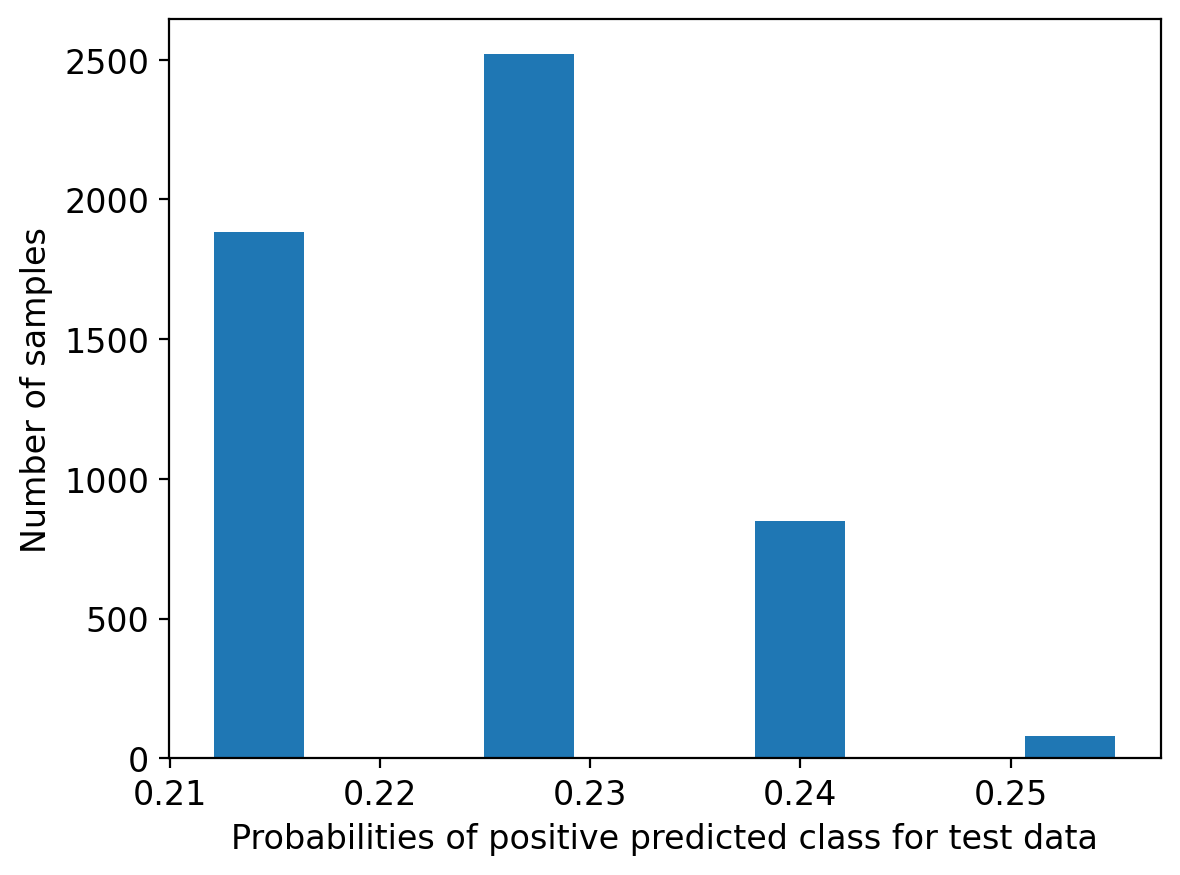

In [45]:
matplotlib.rcParams['font.size'] = 12 # adjust the font size

plt.hist(pos_probs) # Note that there are only 4 bins with samples in them, and they are spaced fairly far apart
# This means in particulary that if we try to adjust bins = X, the plot is going to ignore these values
# The reason is that there are 4 unique probability values and this is because the 
# feature EDUCATION only takes 4 possible values
plt.xlabel('Probabilities of positive predicted class for test data')
plt.ylabel('Number of samples')
plt.show()


In [46]:
pos_probs_positive = pos_probs[y_test == 1]
pos_probs_negative = pos_probs[y_test == 0]

It is quite simple to build a 'barstacked' version of our histogram above, by partitioning our array 'pos_probs' into those whose true value is positive and negative respectively:

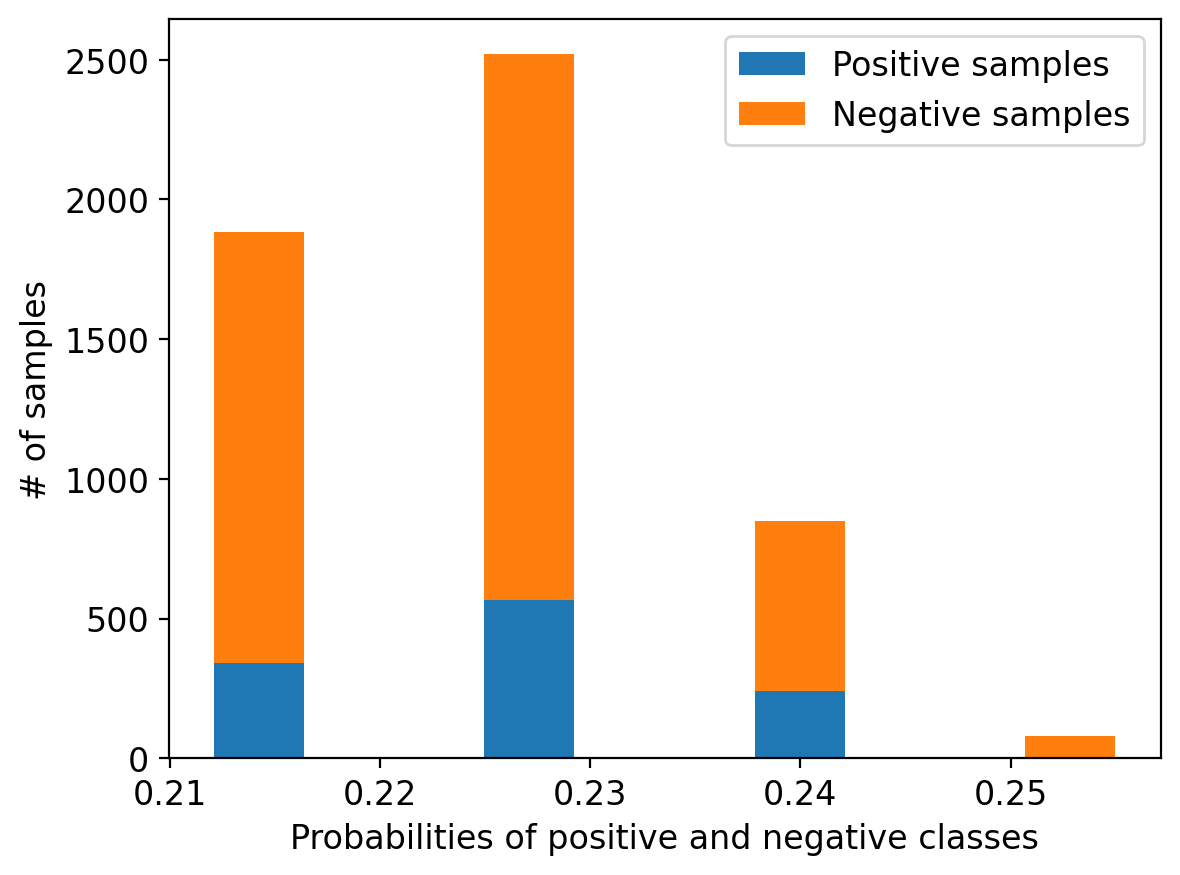

In [47]:
plt.hist([pos_probs_positive, pos_probs_negative], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Probabilities of positive and negative classes')
plt.ylabel('# of samples')
plt.show()

In [48]:
len(y_test)

5333

In [49]:
pos_probs.shape

(5333,)

In [50]:
type(pos_probs)
df_pos_probs = pd.DataFrame(data={'Probs': np.round(pos_probs, 3), 'Class': y_test})
df_pos_probs.head()

,Probs,Class
0,0.226,0
1,0.226,0
2,0.212,0
3,0.226,1
4,0.226,0


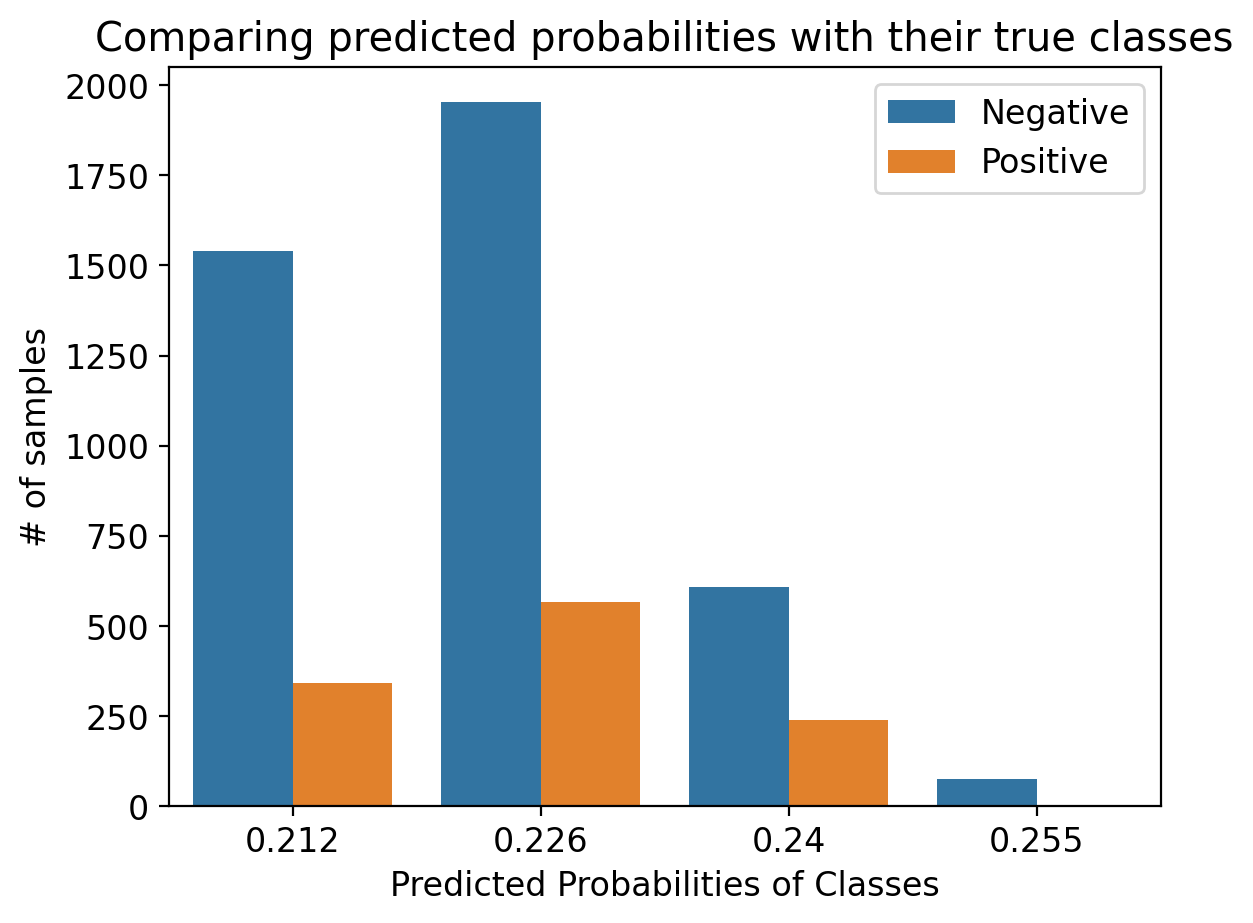

In [51]:
import seaborn as sns

sns.countplot(x='Probs', hue='Class', data=df_pos_probs)
plt.legend(labels=['Negative', 'Positive'])
plt.xlabel('Predicted Probabilities of Classes')
plt.ylabel('# of samples')
plt.title('Comparing predicted probabilities with their true classes')

plt.show()

### The receiver operating characteristic (ROC) curve

In [52]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_probs)
thresholds
# thresholds[0] is arbitrarily set to max(y_scores + 1)

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [53]:
np.unique(pos_probs)

array([0.21207085, 0.22576598, 0.24007604, 0.2549944 ])

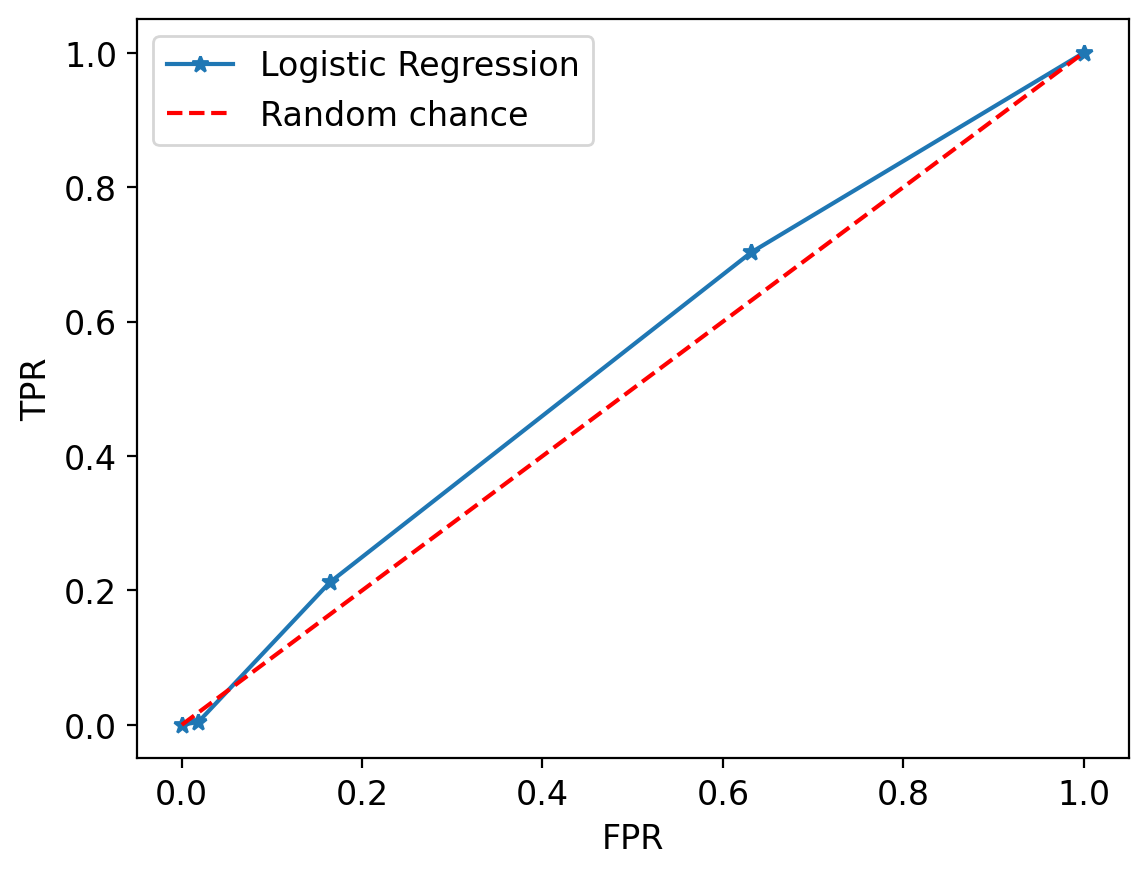

In [54]:
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic Regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()

In [55]:
metrics.roc_auc_score(y_test, pos_probs)

0.5434650477972642

### Activity 2.01: Performing logistic regression with a new feature and creating a precision-recall curve

In [60]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate_school,high_school,others,university
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,...,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,167919.054905,1.603060,1.842334,1.556031,35.505213,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,...,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047,0.221797,0.352985,0.164266,0.015527,0.467222
std,129839.453081,0.489272,0.744661,0.521463,9.227442,1.126769,1.198640,1.199165,1.167897,1.131735,...,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185,0.415463,0.477907,0.370524,0.123637,0.498934
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,8.020000e+02,390.000000,294.750000,242.750000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,800000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.LIMIT_BAL.values.reshape(-1,1), df['default payment next month'].values, test_size=0.2, random_state=24)

In [63]:
n_rows_train = X_train.shape[0]
n_rows_test = X_test.shape[0]
percentage = n_rows_train/ (n_rows_train + n_rows_test)
percentage

0.799992499249925

In [70]:
n_rows_train

21331

In [64]:
np.mean(y_train)

0.223102526838873

In [65]:
np.mean(y_test)

0.21657603600225014

In [66]:
np.mean(np.append(y_test, y_train))

0.2217971797179718

In [68]:
from sklearn.linear_model import LogisticRegression

my_lr_final = LogisticRegression(C=0.1, class_weight=None,
                                 dual=False, fit_intercept=True,
                                 intercept_scaling=1, max_iter=100,
                                 multi_class='auto', n_jobs=None,
                                 penalty='l2', random_state=None,
                                 solver='liblinear', tol=0.0001,
                                 verbose=0, warm_start=False)

In [69]:
my_lr_final.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [71]:
y_pred = my_lr_final.predict(X_test)

In [72]:
accuracy = np.sum((y_pred == y_test))/ len(y_test)
accuracy

0.7834239639977498

In [73]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred) # using EDUCATION as feature accuracy was the same....

0.7834239639977498

In [76]:
y_pred_proba = my_lr_final.predict_proba(X_test)
y_pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [78]:
pos_probs = y_pred_proba[:,1]
pos_probs

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606566])

In [79]:
metrics.roc_auc_score(y_test, pos_probs) # Our LogReg (my_lr_final) classifier 
# using BAL_LIMIT seems slightly better

0.6201990844642832

In [80]:
np.unique(pos_probs)

array([0.00644178, 0.0078901 , 0.00844134, 0.01033455, 0.01264696,
       0.01446524, 0.01546869, 0.01654057, 0.01890793, 0.02021324,
       0.02160667, 0.0230939 , 0.02468092, 0.02637405, 0.02817998,
       0.03010574, 0.03215875, 0.0343468 , 0.03667808, 0.03916119,
       0.0418051 , 0.04461922, 0.04761337, 0.05079775, 0.05418298,
       0.05778008, 0.06160044, 0.06565578, 0.0699582 , 0.07452008,
       0.07935404, 0.08447295, 0.08988983, 0.09561779, 0.10166997,
       0.10805946, 0.11479918, 0.12190182, 0.12937966, 0.13724452,
       0.14550758, 0.15417922, 0.16326891, 0.17278502, 0.18273464,
       0.19312344, 0.20395547, 0.21523299, 0.2269563 , 0.23912359,
       0.25173076, 0.26477132, 0.27823623, 0.29211383, 0.30638978,
       0.321047  , 0.33606566, 0.35142324, 0.3670946 , 0.38305207,
       0.3992656 , 0.415703  , 0.4323301 , 0.44911106, 0.46600867,
       0.48298465])

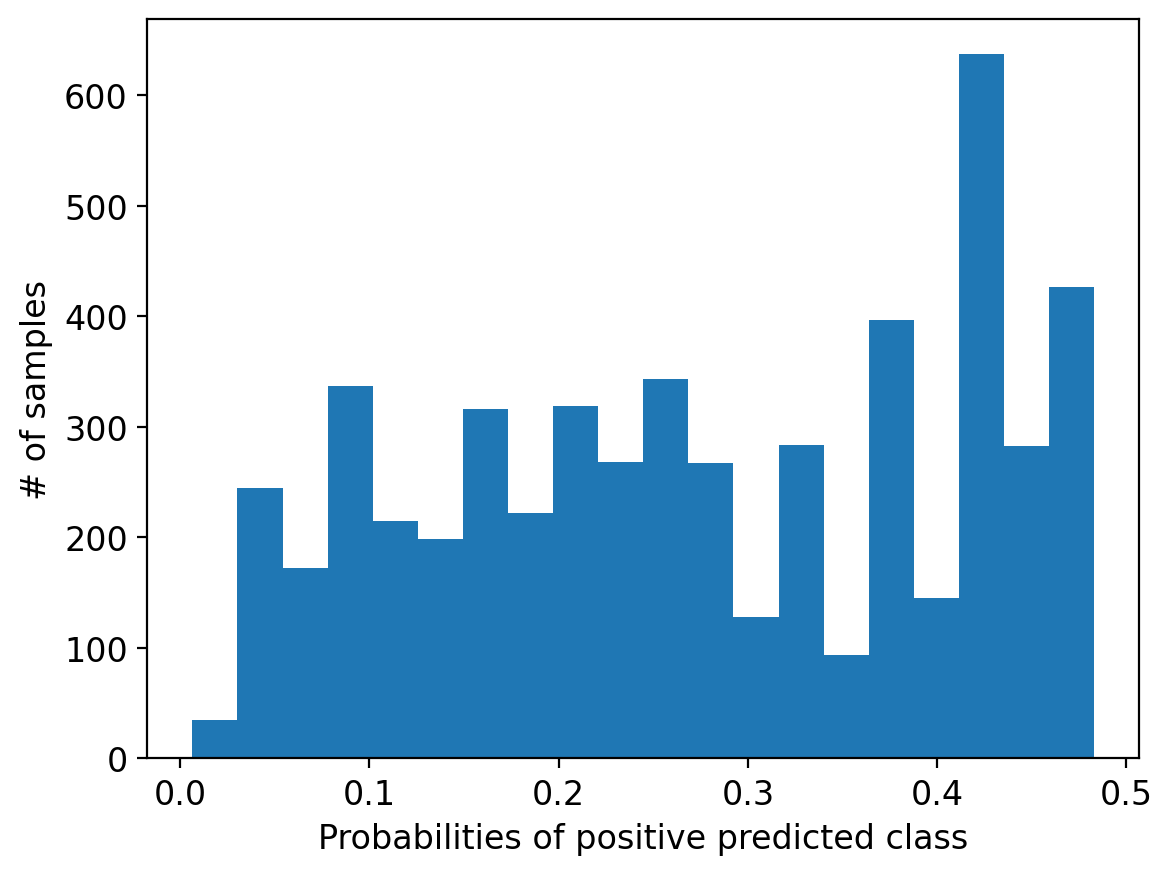

In [84]:
plt.hist(pos_probs, bins=20)
plt.xlabel('Probabilities of positive predicted class')
plt.ylabel('# of samples')
plt.show()

In [87]:
predicted_prob_pos_class = pos_probs[y_test == 1]
predicted_prob_neg_class = pos_probs[y_test == 0]

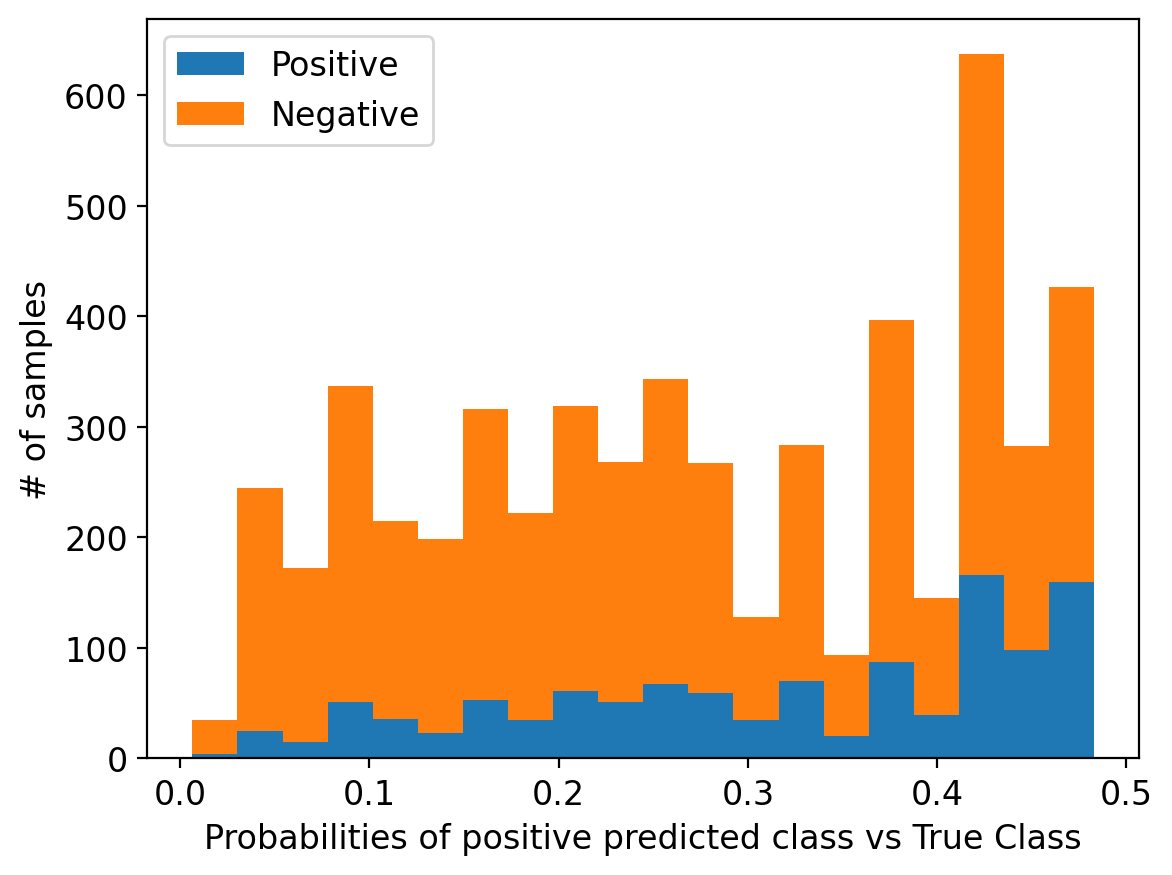

In [90]:
plt.hist([predicted_prob_pos_class, predicted_prob_neg_class], histtype='barstacked', bins=20)
plt.legend(['Positive', 'Negative'])
plt.xlabel('Probabilities of positive predicted class vs True Class')
plt.ylabel('# of samples')
plt.show()

In [91]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_probs)

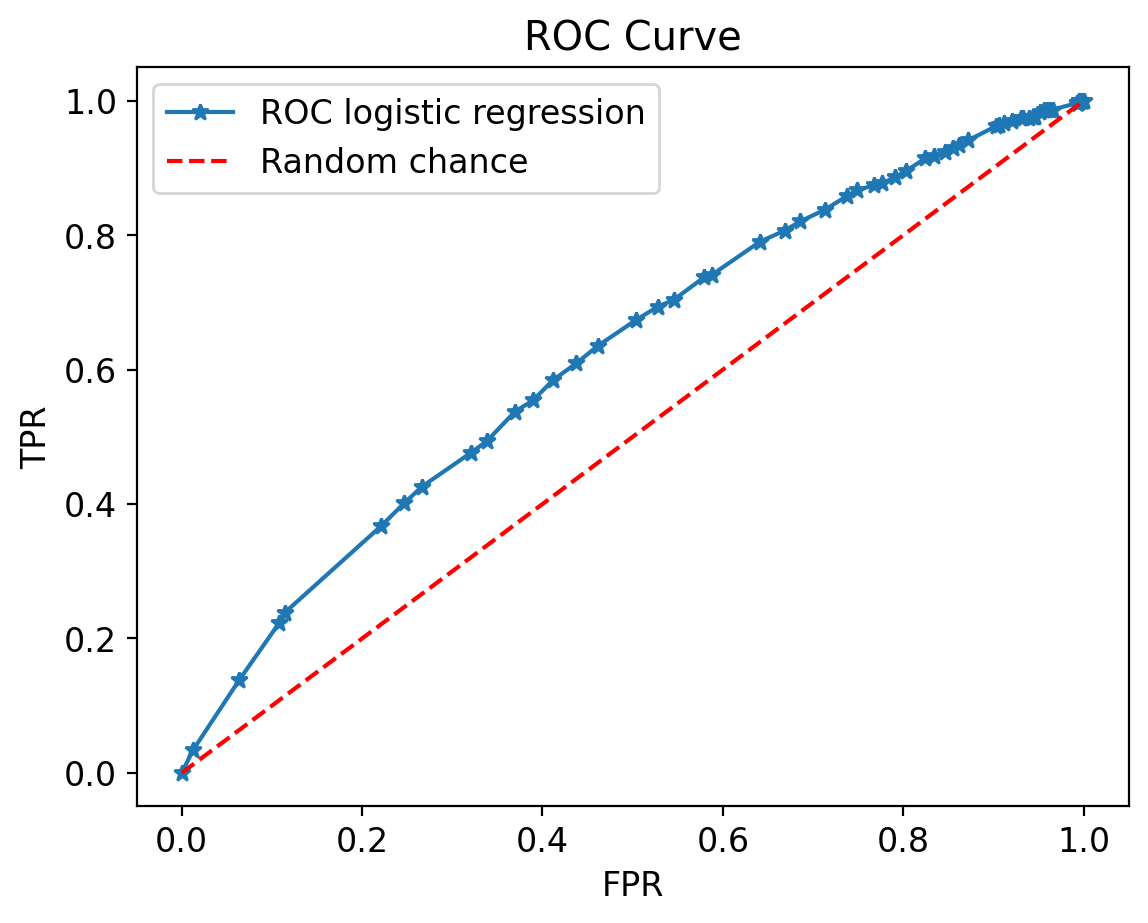

In [93]:
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['ROC logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()


In [95]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pos_probs)

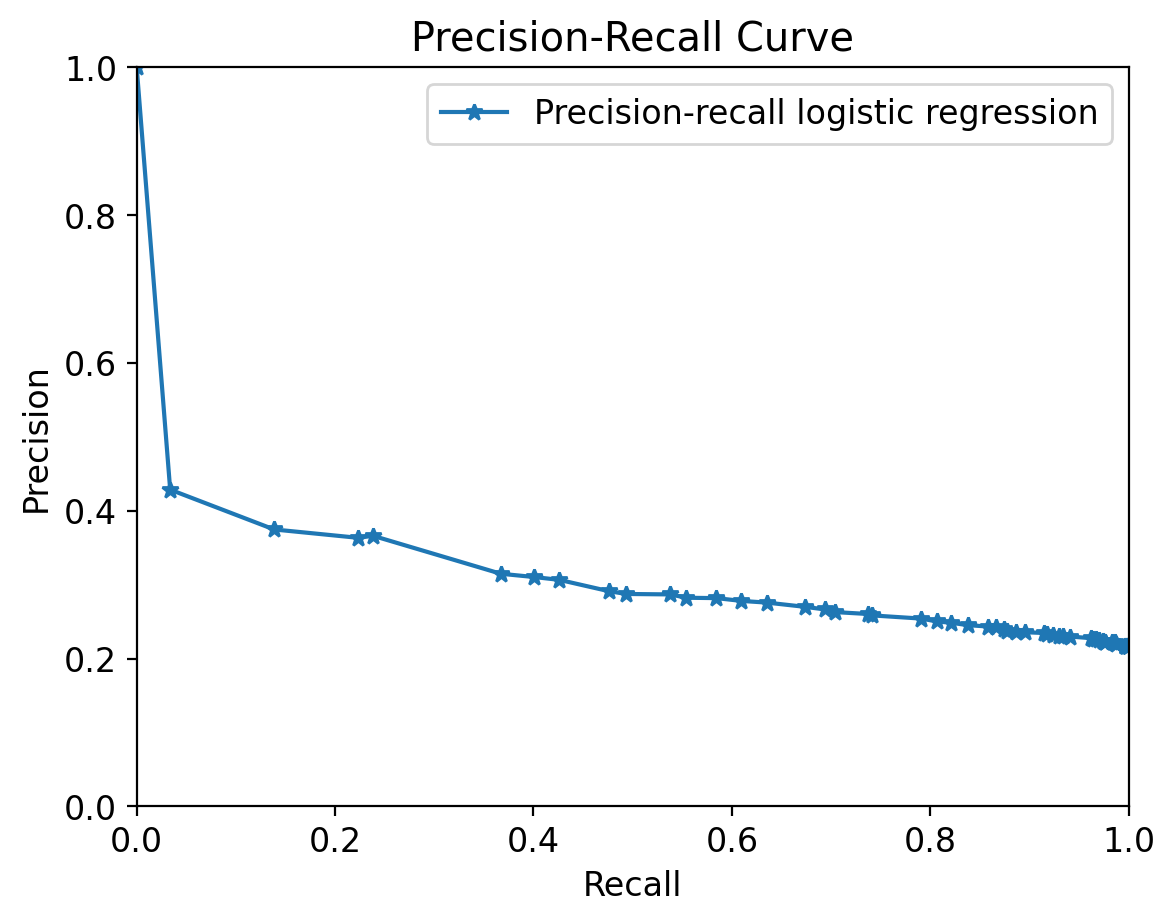

In [100]:
plt.plot(recall, precision, '*-')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(['Precision-recall logistic regression'])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [102]:
metrics.auc(recall, precision)

0.31566964427378624

In [103]:
pos_probs_train = my_lr_final.predict_proba(X_train)[:, 1]
metrics.roc_auc_score(y_train, pos_probs_train) # vs 0.6201990844642832 evauluated on test data 

0.6182918113358344